#### Projekt zaliczeniowy

Celem projektu jest zmotywowanie Państwa do głębszego zrozumienia architektury typu GAN poprzez dokładniejsze przeanalizowanie kodu źródłowego z przykładu prezentowanego na zajęciach. W ramach tego projektu są Państwo proszeni o wykonanie zadań podanych poniżej. W nawiasie przy każdym zadaniu jest podana maksymalna liczba punktów jaką można uzyskać za dane zadanie. 

1) Pokazać, co trzeba zmienić, żeby w dyskryminatorze zmienić rozmiar filtrów na rozmiar 4x4. Jako rozwiązanie należy przedstawić fragment kodu z naniesionymi modyfikacjami. **(2 punkty)**


2) Pokazać, co trzeba zmienić, aby usunąć obrazy krawędzi z wejścia do dyskryminatora (wejściem dla dyskryminatora powinny być tylko obrazy RGB bez zachmurzenia - wygenerowane przez generator lub prawdziwe). Jako rozwiązanie należy przedstawić fragment kodu z naniesionymi modyfikacjami. **(4 punkty)**


3) Usunąć "skip connections" z generatora i pokazać jako to wpłynęło na wynik na danych testowych. Wytrenować dwa modele: oryginalny i zmieniony, a następnie uruchomić wytrenowane modele na danych testowych. Jako wynik pokazać jak zmienił się kod generatora, pokazać wygenerowane obrazy przez oba modele w sposób umożliwiający wizulane porównanie wyników oraz w krótkim opisie (kilka zdań/punktów) podsumować zaobserwowane różnice. **(12 punktów)**

Dodatkowe instrukcje:
 - Rozwiązania poszczególnych zadań mogą być umieszczone w oddzielnych plikach. 
 - Zadania są od siebie niezależne, tzn. modyfikacje wprowadzane w ramach jakiegoś zadania nie są częścią innego zadania. Na przykład, w zadaniu 3 usuwamy tylko "skip connections" względem oryginalnego kodu, **bez** zmieniania rozmiarów filtrów dyskryminatora czy postaci danych wejściowych dyskryminatora.

In [7]:
import tensorflow as tf

Zadanie 1

Zmieniłam rozmiar filtrów w warstwach downsample oraz w dwóch warstwach konwolucyjnych (conv i layer10).

In [4]:
def downsample(filters, size, apply_batchnorm=True):
    #...
def Discriminator():
    #...
    down1 = downsample(64, 4, False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(128, 4)(down2)
    down4 = downsample(256, 4)(down3)
    down5 = downsample(256, 4)(down4)
    down6 = downsample(512, 4)(down5)
    down7 = downsample(512, 4)(down6)
    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down7)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                  kernel_initializer=initializer,
                                  use_bias=False)(zero_pad1)
    # ... (reszta kodu bez zmian)
    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)
    layer10 = tf.keras.layers.Conv2D(1, 4, strides=1,
                                     kernel_initializer=initializer)(zero_pad2)
    # ... (reszta kodu bez zmian)


IndentationError: expected an indented block after function definition on line 1 (542627596.py, line 3)

Zadanie 2

In [ ]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    # edge_clouded_nir = tf.keras.layers.Input(shape=[256, 256, 1], name='edge_clouded_nir')
    cloud_free_rgb = tf.keras.layers.Input(shape=[256, 256, 3], name='cloud_free_rgb')
    # edge_cloud_free_rgb = tf.keras.layers.Input(shape=[256, 256, 1], name='edge_cloud_free_rgb')
    # gray_edge_clouded_rgb = tf.keras.layers.Input(shape=[256, 256, 1], name='gray_edge_clouded_rgb')
    x = cloud_free_rgb
    
    # ... (kod bez zmian)
    
    return tf.keras.Model(inputs=[cloud_free_rgb], outputs=tf.keras.activations.sigmoid(dense))


Zadanie 3

In [5]:
# ... (kod bez zmian)
def Generator():

    # ... (kod bez zmian)
    
    # Downsampling through the model
    for down in down_stack:
        x = down(x)

    # Upsampling
    for up in up_stack:
        x = up(x)

    x = last(x)

    return tf.keras.Model(inputs=[clouded_rgb, clouded_nir], outputs=x)


    # ... (kod bez zmian)

ModuleNotFoundError: No module named 'google.colab'

### Wyniki dla oryginalnego modelu

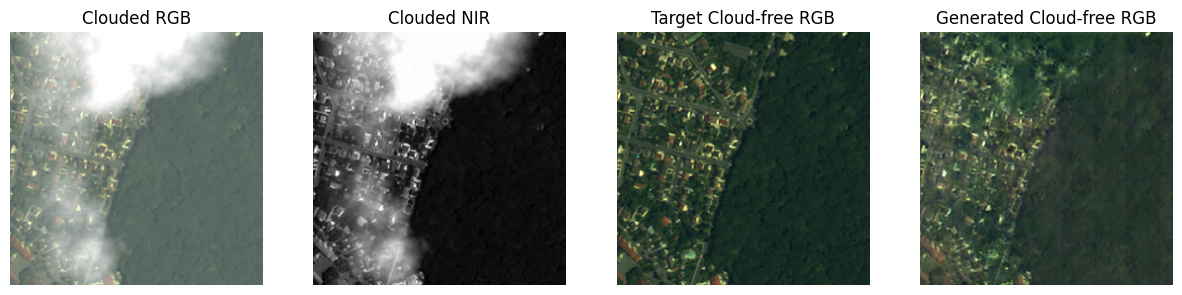

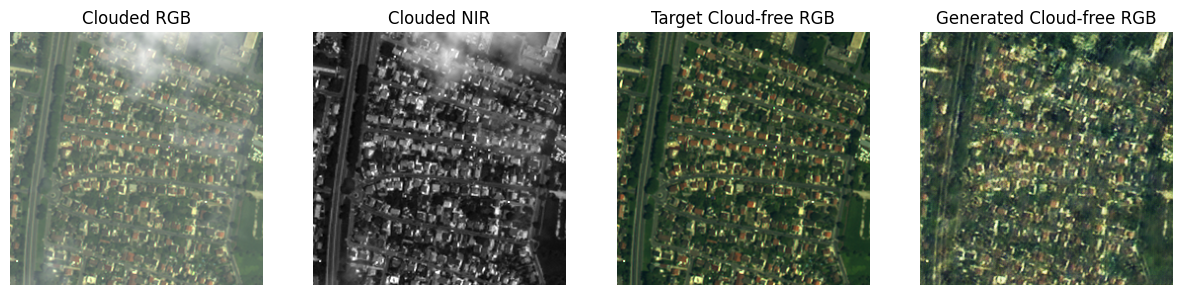

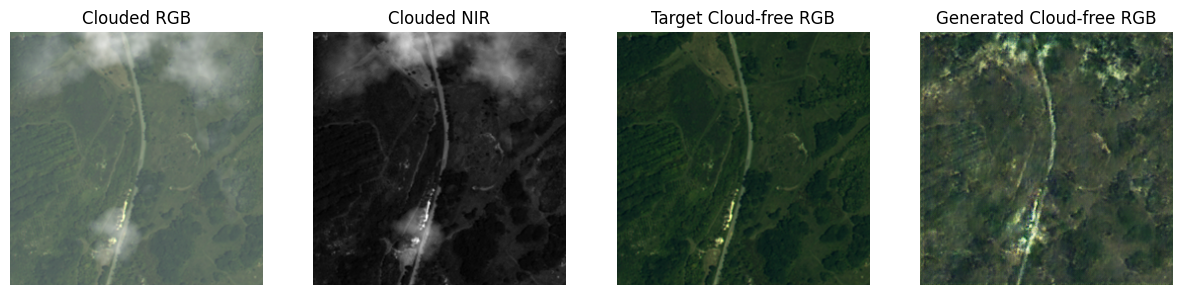

In [4]:
from IPython.display import display, Image
display(Image(filename="Unknown-2.png"))
display(Image(filename="Unknown-3.png"))
display(Image(filename="Unknown-4.png"))

### Wyniki dla zmodyfikowanego modelu

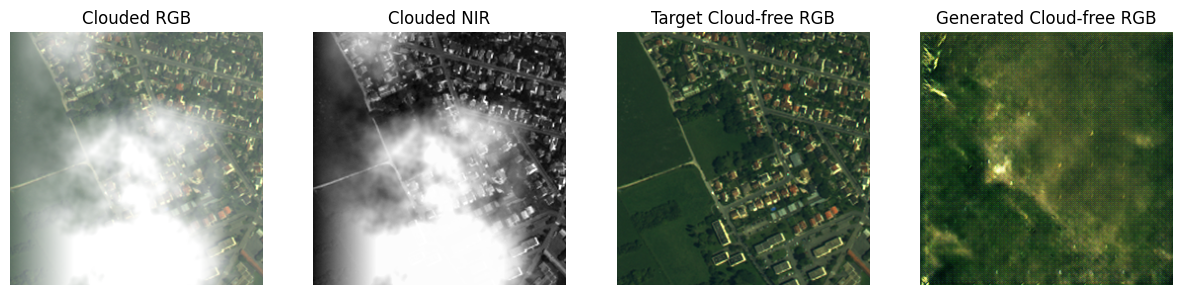

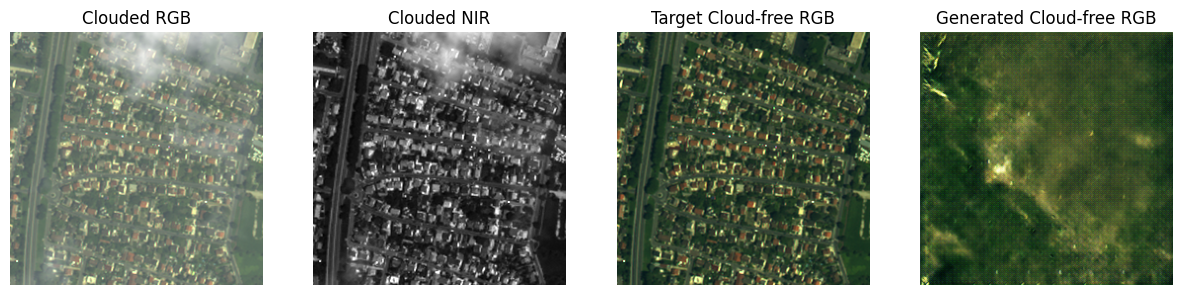

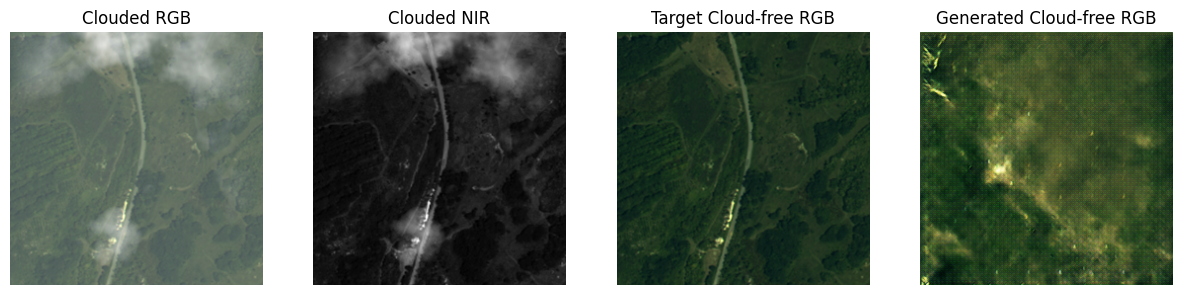

In [5]:
display(Image(filename="Unknown.png"))
display(Image(filename="Unknown-5.png"))
display(Image(filename="Unknown-6.png"))

### Podsumowanie


Jak widac na załączonych wyzej obrazkach, usunięcie "skip connections" z generatora spowodowało, że wygenerowane obrazy są są zawsze takie same, niezależnie od danych wejściowych. W oryginalnym modelu, wygenerowane obrazy różnią się od siebie. Co za tym idzie, zmodyfikowany model nie jest w stanie nauczyć się generować obrazów, które będą podobne do obrazów wejściowych. Dodatkowo w oryginalnym modelu widać, że obrazy są bardziej ostre, a w zmodyfikowanym modelu obrazy są bardziej rozmyte.

Moja hipoteza jest taka, że usunięcie "skip connections" spowodowało, że model nie jest w stanie nauczyć się generować obrazów, które będą podobne do obrazów wejściowych, ponieważ nie ma możliwości, aby informacje z warstw wcześniejszych były przekazywane do warstw późniejszych. W związku z tym, model nie jest w stanie nauczyć się, jakie cechy powinny być zachowane w obrazach wyjściowych. Informacja o tym jak wygląda zdjecie jest gubiona podczas downsamplingu, a w związku z tym, że nie ma "skip connections", nie ma możliwości, aby ta informacja była przekazywana do warstw późniejszych. W związku z tym, model nie jest w stanie nauczyć się, jakie cechy powinny być zachowane w obrazach wyjściowych. 
Zatem "skip connections" są niezbędne do poprawnego działania modelu.